# Основы анализа данных в Python

*Алла Тамбовцева*

## Практикум 3.2. Обработка опросных данных и визуализация качественных данных

## Часть 1: подготовка данных

Импортируем библиотеку `pandas` и модуль `pyplot` из библиотеки `matplotlib` для отрисовки графиков:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Загрузим данные из Excel-файла с результатами сказочного опроса (см. страницу курса). Так как в файле Excel несколько листов (выбор героев на основе текстового описания, лайки и дизлайки, итоговый выбор героев, информация по актерам), загрузим каждый из них в отдельный датафрейм:

In [2]:
# в sheet_name может быть название листа или его индекс
# лист с актерами пока не трогаем

start = pd.read_excel("NPK_fin.xlsx", sheet_name = "описание")
likes = pd.read_excel("NPK_fin.xlsx", sheet_name = "лайки")
end = pd.read_excel("NPK_fin.xlsx", sheet_name = "итоговый выбор")

Посмотрим на первые 5 строк из каждого датафрейма и убедимся, что датафреймы имеют одинаковую структуру:

In [3]:
start.head()

,id,опрос,профиль,пол,Теодор,Флора,Альбина,Патрик,Пенапью,Давиль,Оттилия,Жак,Марта,Марселла
0,35,4,политология и управление,жен,0,1,1,0,0,0,0,0,0,0
1,36,4,политология и управление,жен,0,0,0,0,0,1,0,1,0,0
2,37,4,политология и управление,жен,0,0,0,0,0,0,0,1,0,0
3,38,4,политология и управление,жен,0,0,0,1,1,0,0,0,0,0
4,39,4,политология и управление,муж,0,0,0,0,0,1,1,0,0,0


In [4]:
end.head()

,id,опрос,профиль,пол,Теодор,Флора,Альбина,Патрик,Пенапью,Давиль,Оттилия,Жак,Марта,Марселла
0,35,4,политология и управление,жен,0,0,0,0,0,1,1,0,0,0
1,36,4,политология и управление,жен,0,0,0,0,0,0,1,1,0,0
2,37,4,политология и управление,жен,0,0,0,0,0,0,1,1,0,0
3,38,4,политология и управление,жен,0,0,0,0,0,0,0,0,1,1
4,39,4,политология и управление,муж,0,0,0,0,0,1,1,0,0,0


In [5]:
likes.head()

,id,опрос,профиль,пол,Теодор,Флора,Альбина,Патрик,Пенапью,Давиль,Оттилия,Жак,Марта,Марселла
0,35,4,политология и управление,жен,1,0,1,1,0,0,1,1,1,1
1,36,4,политология и управление,жен,0,0,1,1,0,1,1,1,1,1
2,37,4,политология и управление,жен,0,0,1,1,0,0,1,1,1,0
3,38,4,политология и управление,жен,0,1,0,1,0,0,1,1,1,1
4,39,4,политология и управление,муж,0,0,0,1,0,1,1,1,0,0


Возьмем для примера датафрейм `start` и запросим по нему техническую информацию:

In [6]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        133 non-null    object
 1   опрос     133 non-null    int64 
 2   профиль   133 non-null    object
 3   пол       125 non-null    object
 4   Теодор    133 non-null    int64 
 5   Флора     133 non-null    int64 
 6   Альбина   133 non-null    int64 
 7   Патрик    133 non-null    int64 
 8   Пенапью   133 non-null    int64 
 9   Давиль    133 non-null    int64 
 10  Оттилия   133 non-null    int64 
 11  Жак       133 non-null    int64 
 12  Марта     133 non-null    int64 
 13  Марселла  133 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 14.7+ KB


Так как номер опроса – показатель качественный, а не количественный, превратим его в текст:

In [7]:
# вспоминаем про метод .astype() 
# и меняем тип столбца в каждом датафрейме

start["опрос"] = start["опрос"].astype(str)
end["опрос"] = end["опрос"].astype(str)
likes["опрос"] = likes["опрос"].astype(str)

Так как выбор героев в нашем случае представлен в бинарном виде, никто не мешает просуммировать столбцы и получить число респондентов, проголосовавших за каждого из героев. Посмотрим, каких героев выбирали чаще, а каких – реже, причем отдельно оценим выбор в начале опроса и в конце:

In [8]:
# numeric_only = True: выбор только числовых столбцов
# добавляем сортировку по убыванию

print("Выбор по текстовому описанию:")
start.sum(numeric_only = True).sort_values(ascending = False)

Выбор по текстовому описанию:


Патрик      37
Давиль      36
Жак         36
Марта       32
Альбина     25
Оттилия     24
Марселла    17
Пенапью     16
Флора       15
Теодор      11
dtype: int64

In [9]:
print("Итоговый выбор:")
end.sum(numeric_only = True).sort_values(ascending = False)

Итоговый выбор:


Оттилия     54
Патрик      49
Марта       36
Давиль      34
Жак         33
Альбина     12
Марселла    12
Теодор       9
Пенапью      6
Флора        3
dtype: int64

Не забудем про лайки и дизлайки:

In [10]:
print("Лайки и дизлайки:")
likes.sum(numeric_only = True).sort_values(ascending = False)

Лайки и дизлайки:


Марта       119
Жак         117
Патрик      108
Оттилия     104
Альбина      83
Давиль       83
Теодор       77
Флора        68
Марселла     67
Пенапью      52
dtype: int64

Теперь перейдем к построению графиков. Логичнее всего смотреть на итоговый выбор, на нем пока и остановимся.

## Часть 2: визуализация качественных данных

Для гарантированного появления графиков в текущем ipynb-файле:

In [11]:
%matplotlib inline

### Задача 1

Из датафрейма с итоговым выбором `end` выберите строки, соответствующие политологам и студентам схожих специальностей (профиль `политология и управление`), и сохраните их в датафрейм `polit`.

In [12]:
# само условие end["профиль"] == "политология и управление"
# помещаем в скобки –> фильтрация

polit = end[end["профиль"] == "политология и управление"]
polit

,id,опрос,профиль,пол,Теодор,Флора,Альбина,Патрик,Пенапью,Давиль,Оттилия,Жак,Марта,Марселла
0,35,4,политология и управление,жен,0,0,0,0,0,1,1,0,0,0
1,36,4,политология и управление,жен,0,0,0,0,0,0,1,1,0,0
2,37,4,политология и управление,жен,0,0,0,0,0,0,1,1,0,0
3,38,4,политология и управление,жен,0,0,0,0,0,0,0,0,1,1
4,39,4,политология и управление,муж,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,29,7,политология и управление,муж,0,0,0,0,0,1,1,0,0,0
128,30,7,политология и управление,муж,0,0,0,0,0,1,0,0,0,0
129,31,7,политология и управление,муж,1,0,0,0,0,0,0,0,1,0
130,32,7,политология и управление,жен,0,0,0,1,0,0,1,0,0,0


### Задача 2

Просуммируйте все числовые столбцы в `polit` и отсортируйте строки в полученной таблице в порядке убывания результатов суммирования. Сохраните таблицу с названием `tab`.

In [13]:
# функция sum(), применяем сразу ко всему датафрейму
# только числовые, numeric_only = True

polit.sum(numeric_only = True)

Теодор       4
Флора        1
Альбина      6
Патрик      22
Пенапью      2
Давиль      21
Оттилия     25
Жак         16
Марта       16
Марселла     4
dtype: int64

In [14]:
# сортируем по убыванию ascending = False

tab = polit.sum(numeric_only = True).sort_values(ascending = False)
tab

Оттилия     25
Патрик      22
Давиль      21
Жак         16
Марта       16
Альбина      6
Теодор       4
Марселла     4
Пенапью      2
Флора        1
dtype: int64

### Задача 3

Используя таблицу `tab`, постройте столбиковую диаграмму для итогового выбора героев. 

Сначала заберем с таблички `tab` выше названия (имена героев, они же индексы `index`) и соответствующие им частоты (они же значения `values`):

In [15]:
x = tab.index
y = tab.values

Посмотрим на них:

In [16]:
x

Index(['Оттилия', 'Патрик', 'Давиль', 'Жак', 'Марта', 'Альбина', 'Теодор',
       'Марселла', 'Пенапью', 'Флора'],
      dtype='object')

In [17]:
y

array([25, 22, 21, 16, 16,  6,  4,  4,  2,  1])

Импортируем модуль `pyplot` из `matplotlib` с сокращенным названием `plt` и берем оттуда функцию `barplot()`:

In [18]:
from matplotlib import pyplot as plt

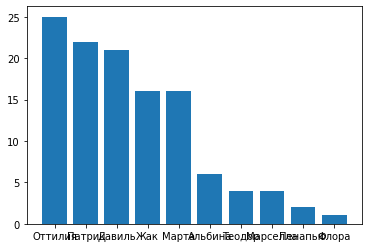

In [19]:
# нормально, но мелко и неэстетично

plt.bar(x, y);

### Задача 4

Усовершенствуйте полученную диаграмму: 

* настройте цвета;
* добавьте подписи к осям;

Сделайте картинку размера 16 на 9 дюймов с разрешением 300 точек на дюйм и выгрузите в png-файл.

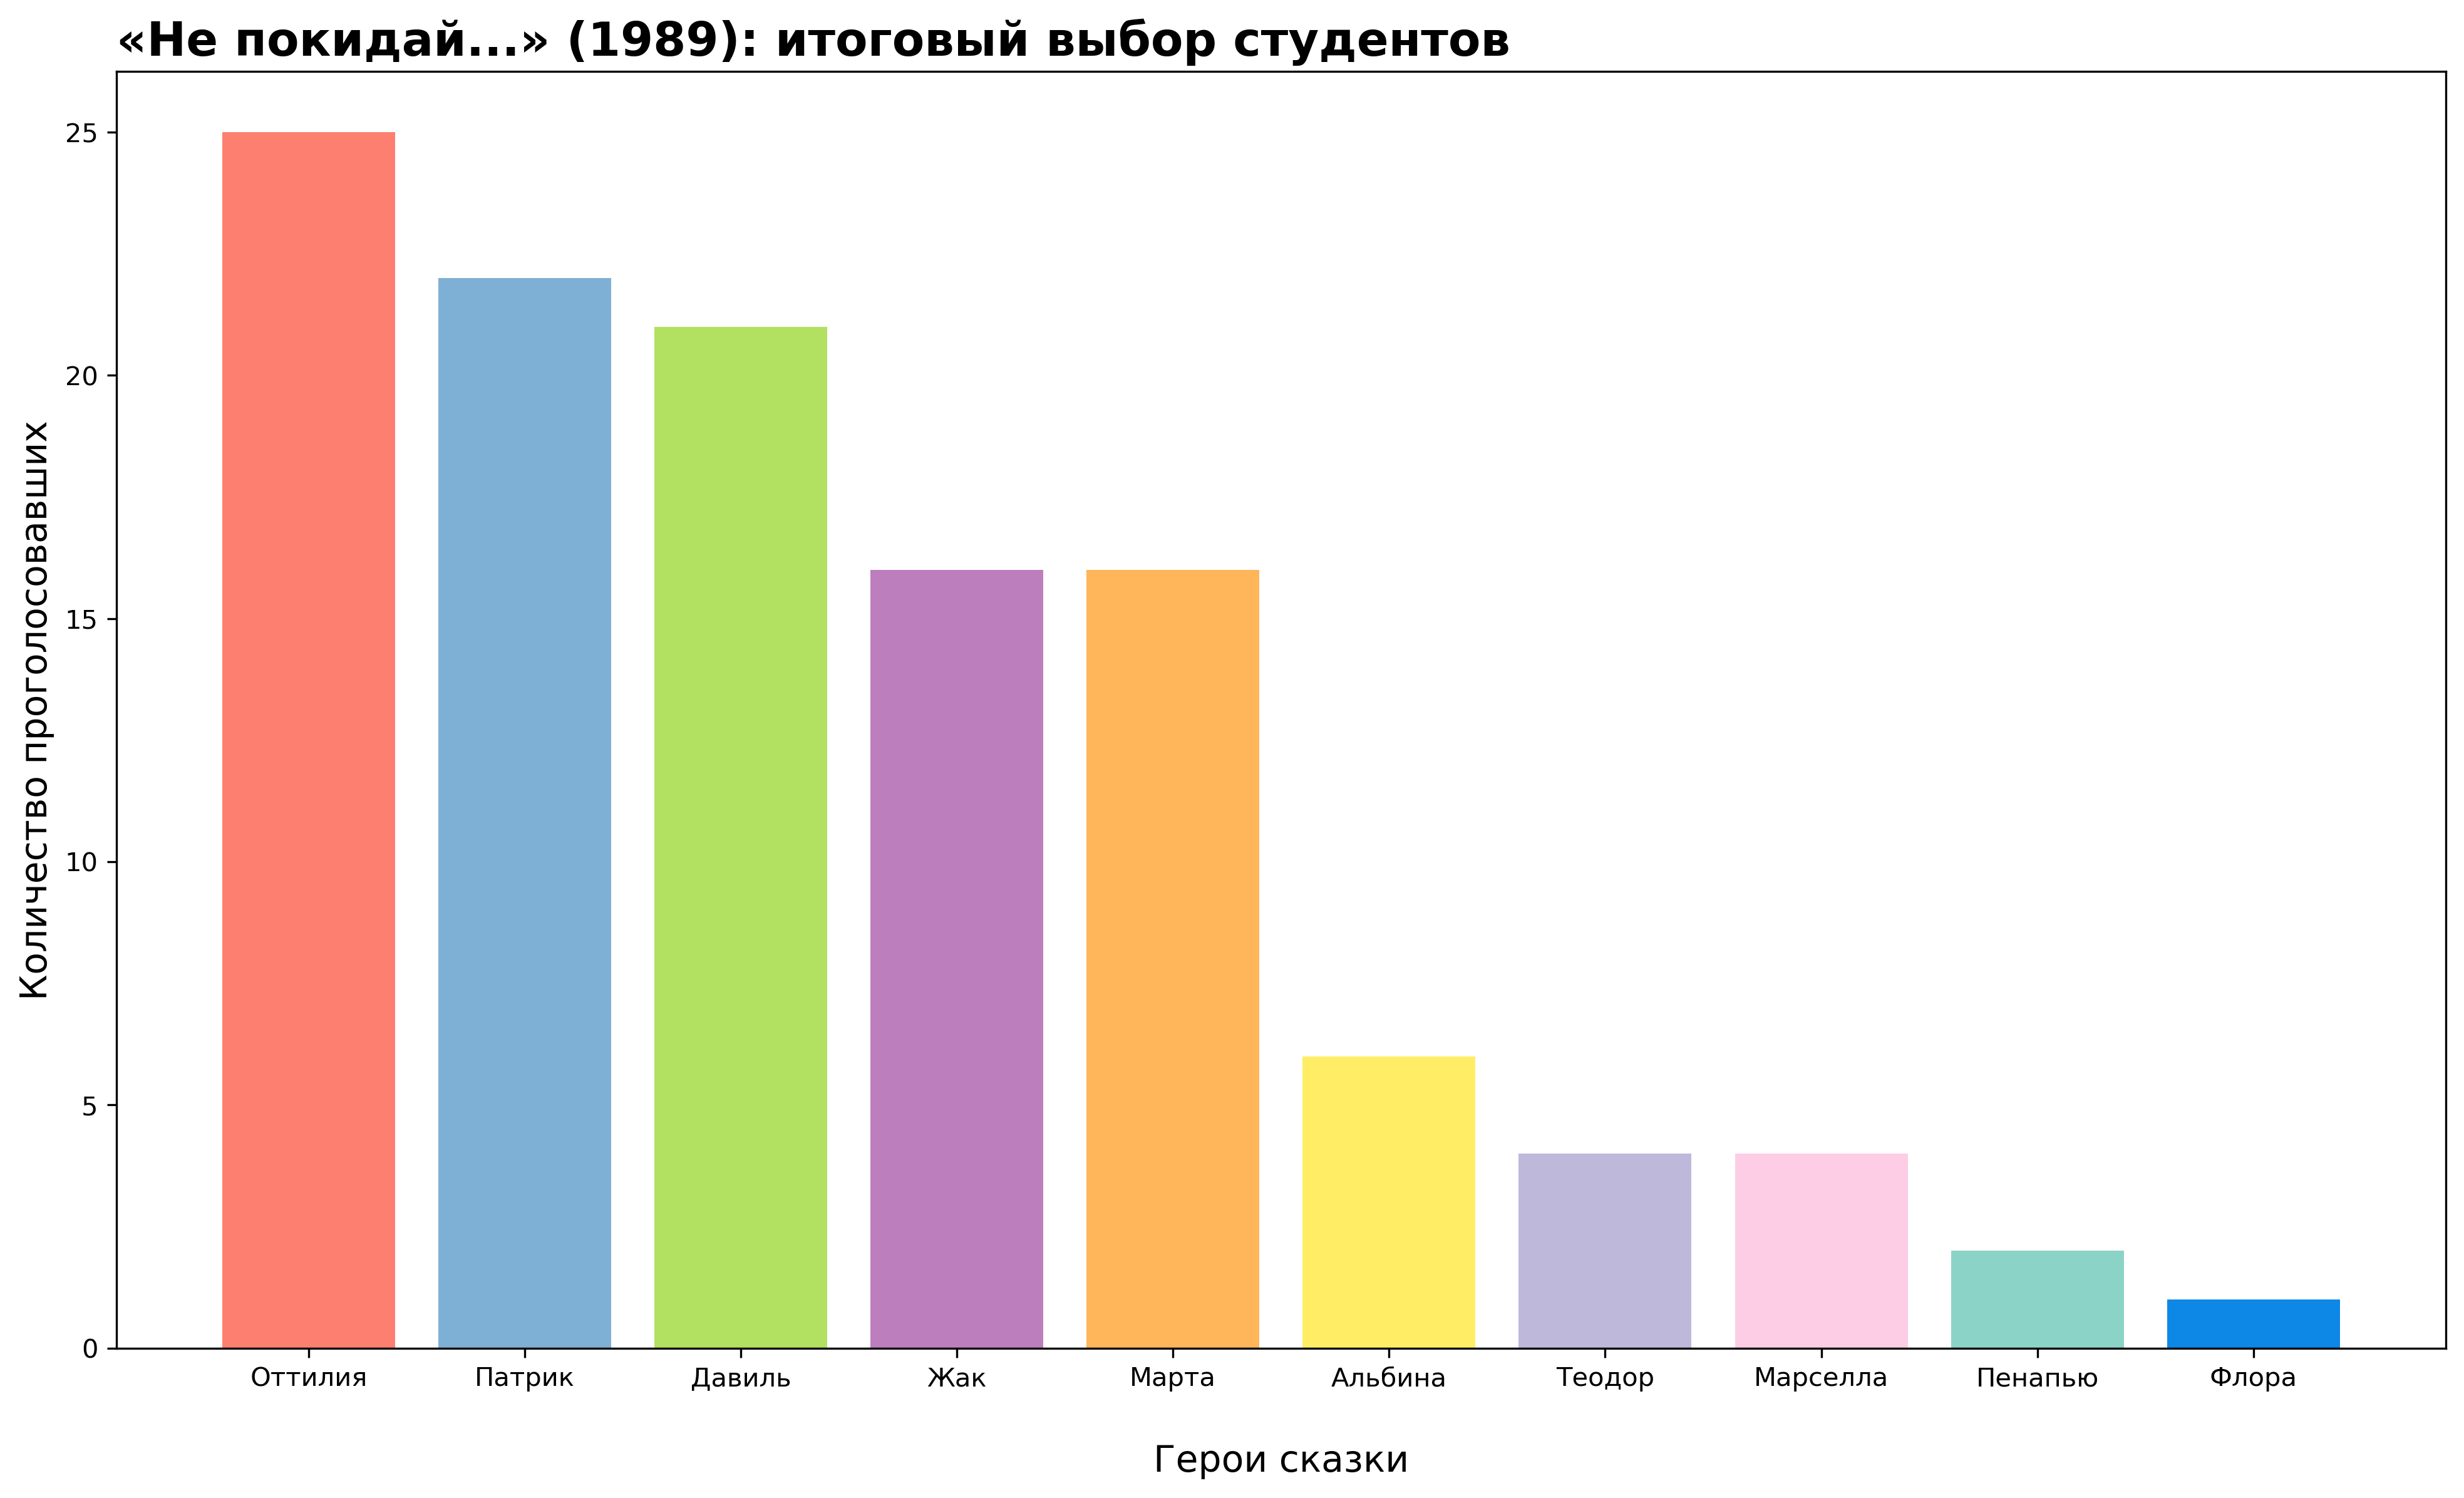

In [20]:
# список цветов для примера

cc = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a",
      "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7", "#0d88e6"]

# для создания графика желаемого размера с хорошим разрешением 300 точек

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# теперь bar() как метод для ax
# в color помещаем список цветов

ax.bar(x, y, color = cc);

# подписи к осям
# заодно корректируем размер шрифта и начертание
# fontsize – размер шрифта, fontweight – начертание, 
# labelpad – отступ от оси, чтобы название оси не «приклеивалось» к значениям
# loc – положение заголовка

ax.set_xlabel("Герои сказки", fontsize = 14, labelpad = 20);
ax.set_ylabel("Количество проголосовавших", fontsize = 14);
ax.set_title("«Не покидай...» (1989): итоговый выбор студентов", 
             fontsize = 18, 
             fontweight = "semibold",
             loc = "left");

# выгружаем 

fig.savefig("bar01.png")

### Задача 5

Постройте круговую диаграмму для итогового выбора героев. 

Можем просто взять функцию/метод `pie()` из `plt` (если берем ее из `plt` в виде `plt.pie()`, это функция, если применяем к `ax` как в случае с диаграммой выше в виде `ax.pie()`, это метод). 

Этой функции/методу на вход нужно передать следующее:

* частоты для построения графика (значения из `y` в нашем случае);
* подписи `labels` для секторов диаграммы (имена из `x` в нашем случае);
* список цветов `colors` (значения из `cc` в нашем случае).

Также, если мы хотим, чтобы на графике были отмечены проценты (а обычно мы хотим, иначе какой смысл диаграммы), нам нужно добавить опцию `autopct`, которая автоматически переводит абсолютные частоты из `y` в проценты (название функции от *auto percentage*) и указать *формат процентов*.

Формат процентов:

* если хотим целые числа, то есть проценты, округленные до целых, пишем `%i%%`; в такой записи `%i` означает «подставляй сюда значения типа *integer*», то есть целочисленный формат, а `%%` – символ процента (одиночный `%` воспринимается как специальный символ, сравните смысл `%` перед `i` и здесь);

* если хотим дробные числа, например, проценты, округленные до второго знака после точки, пишем `%.2f%%`; в такой записи `%.2f` означает «подставляй сюда значения типа *float* с двумя знаками после точки», то есть десятичные дроби с точностью до второго знака.

Итак, строим диаграмму:

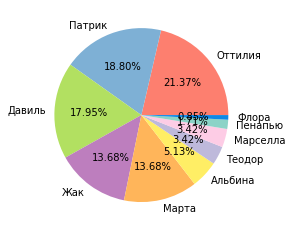

In [21]:
plt.pie(y, labels = x, colors = cc, autopct = "%.2f%%");

### Задача 6

Постройте кольцевую диаграмму для итогового выбора героев.

В модуле `plt` нет специальной функции для кольцевой диаграммы, поэтому придётся пойти на хитрость:

* построить обычную круговую диаграмму, как выше;
* добавить на неё белый круг желаемого радиуса.

Код далее, конечно, сложноват для восприятия, но давайте просто считать, что у нас есть готовый блок кода для диаграмм, если понадобится, всегда сможете его использовать.

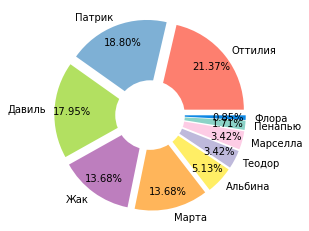

In [22]:
# немного мистики и магии – очерчиваем белый круг
# радиуса 0.4 с центром в (0, 0)
# fc = face color, цвет заливки

centre_circle = plt.Circle((0, 0), 0.4, fc = 'white')

# сохраняем текущий график – тот, что ниже через pie()
# gcf = get current figure

fig = plt.gcf()

# изменяем расстояние до подписей с процентами от центра на 0.8
# pctdistance = 0.8

# добавляем расстояние между секторами explode,
# везде одинаковое, равное 0.1, поэтому нужен список, где 0.1 повторено 10 раз
# чтобы не писать его руками, список [0.1] растягиваем на 10 элементов через *

plt.pie(y,
        colors = cc,
        labels = x,
        autopct = '%.2f%%',
        pctdistance = 0.8,
        explode = [0.1] * 10)

# в оси уже существующего графика добавляем круг
# gca = get current axes

fig.gca().add_artist(centre_circle);

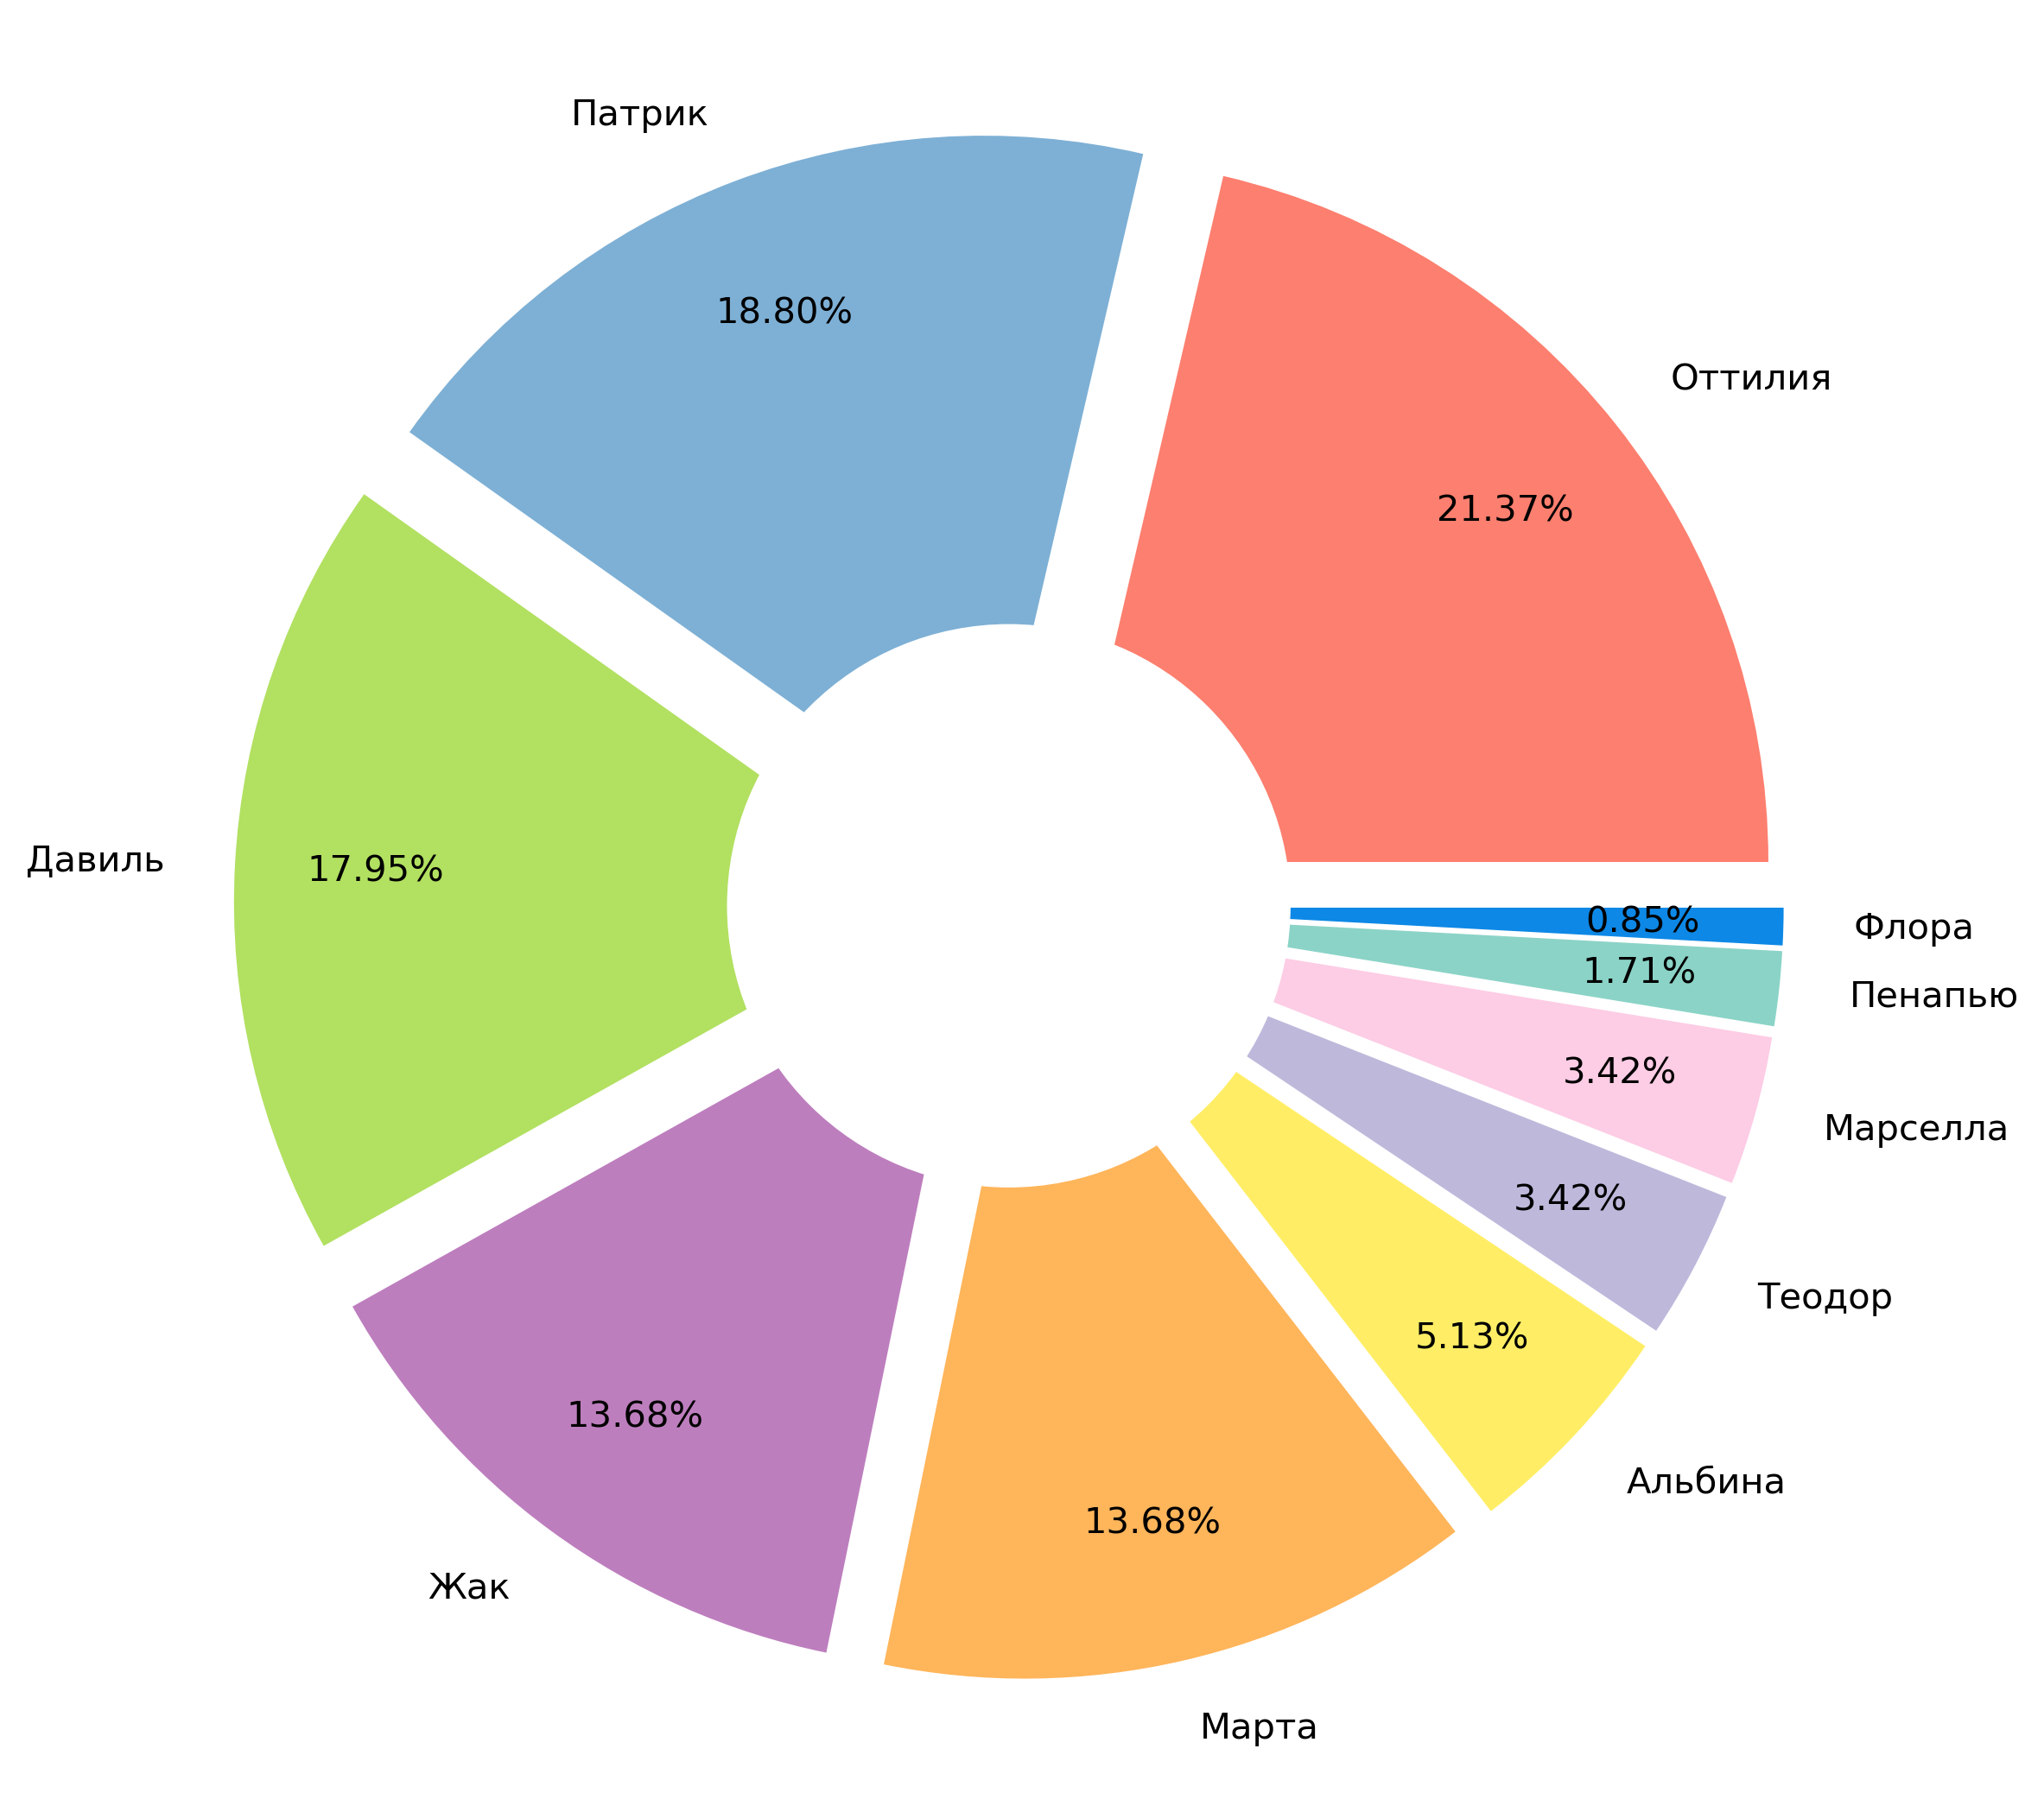

In [23]:
# то же, но крупнее – работаем с осями
# сначала создаем отдельный круг

centre_circle = plt.Circle((0, 0), 0.4, fc = 'white')

# потом оси желаемого размера
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# отрисовываем в них диаграмму
ax.pie(y,
        colors = cc,
        labels = x,
        autopct = '%.2f%%',
        pctdistance = 0.8,
        explode = [0.1] * 10)

# добавляем круг
plt.gca().add_artist(centre_circle);

## Часть 3: агрегирование и сравнение по группам

В предыдущей части мы работали только с итоговым выбором героя из датафрейма `end`. Однако более логично было бы попытаться построить сводный индекс одобрения героев, чтобы сохранить как можно больше информации о предпочтениях респондентов. 

Итак, на входе по каждому герою у нас есть три набора данных из 0 и 1: одобрение/неодобрение по текстовому описанию, одобрение/неодобрение по кадрам и одобрение/неодобрение при итоговом выборе. Никто не мешает объединить эти наборы простым суммированием и получить единый индекс одобрения героев. Если герой совсем не понравился респонденту, по всем трем измерениям у него будут нули, если понравился во всех аспектах, по всем трем измерениям у него будут единицы. В итоге при суммировании измерений мы получим вполне себе количественный индекс, принимающий целые значения от 0 до 3.

Проделаем эти манипуляции для всех героев (не закапываемся в циклы, поэтому честно пишем 10 строчек, по одному для каждого героя):

In [24]:
king = start["Теодор"] + end["Теодор"] + likes["Теодор"]
queen = start["Флора"] + end["Флора"] + likes["Флора"]
princess = start["Альбина"] + end["Альбина"] + likes["Альбина"]
poet = start["Патрик"] + end["Патрик"] + likes["Патрик"]
prince = start["Пенапью"] + end["Пенапью"] + likes["Пенапью"]
kanzler = start["Давиль"] + end["Давиль"] + likes["Давиль"]
kanzler_wife = start["Оттилия"] + end["Оттилия"] + likes["Оттилия"]
actor = start["Жак"] + end["Жак"] + likes["Жак"]
actress = start["Марта"] + end["Марта"] + likes["Марта"]
maid = start["Марселла"] + end["Марселла"] + likes["Марселла"]

Посколько здесь нас интересуют не столько сами герои, сколько то, какие студенты их выбирали чаще всего, заберем из датафрейма `start` столбцы с характеристиками самих респондентов – профиль и пол – и соберем все полученные данные в единый датафрейм `pref`:

In [25]:
#  датафреймы можно собирать на основе словаря
# ключи – названия столбцов
# значения – массивы/списки/столбцы датафрейма

pref = pd.DataFrame({"профиль" : start["профиль"], 
                     "пол" : start["пол"], 
                     "опрос" : start["опрос"],
                     "Теодор" : king, 
                     "Флора" : queen, 
                     "Альбина" : princess, 
                     "Патрик" : poet, 
                     "Пенапью" : prince, 
                     "Давиль" : kanzler,
                     "Оттилия" : kanzler_wife,
                     "Жак" : actor, 
                     "Марта" : actress,
                     "Марселла" : maid})

Посмотрим на первые 5 строк:

In [26]:
pref.head()

,профиль,пол,опрос,Теодор,Флора,Альбина,Патрик,Пенапью,Давиль,Оттилия,Жак,Марта,Марселла
0,политология и управление,жен,4,1,1,2,1,0,1,2,1,1,1
1,политология и управление,жен,4,0,0,1,1,0,2,2,3,1,1
2,политология и управление,жен,4,0,0,1,1,0,0,2,3,1,0
3,политология и управление,жен,4,0,1,0,2,1,0,1,1,2,2
4,политология и управление,муж,4,0,0,0,1,0,3,3,1,0,0


Вспомним группировку и агрегирование!

### Задача 7

Сгруппируйте данные по полу и вычислите средний рейтинг одобрения для каждого из героев.

In [27]:
# более старая версия pandas

pref.groupby("пол").agg("mean")

,Теодор,Флора,Альбина,Патрик,Пенапью,Давиль,Оттилия,Жак,Марта,Марселла
пол,,,,,,,,,,
жен,0.681159,0.811594,0.898551,1.362319,0.579710,0.840580,1.565217,1.376812,1.521739,0.840580
муж,0.785714,0.482143,0.875000,1.589286,0.571429,1.535714,1.107143,1.375000,1.267857,0.607143


In [28]:
# в новой версии pandas добавьте внутрь agg() 
# аргумент numeric_only = True

pref.groupby("пол").agg("mean", numeric_only = True)

,Теодор,Флора,Альбина,Патрик,Пенапью,Давиль,Оттилия,Жак,Марта,Марселла
пол,,,,,,,,,,
жен,0.681159,0.811594,0.898551,1.362319,0.579710,0.840580,1.565217,1.376812,1.521739,0.840580
муж,0.785714,0.482143,0.875000,1.589286,0.571429,1.535714,1.107143,1.375000,1.267857,0.607143


### Задача 8

Сгруппируйте данные по профилю и вычислите средний рейтинг одобрения для каждого из героев.

In [29]:
pref.groupby("профиль").agg("mean", numeric_only = True)

,Теодор,Флора,Альбина,Патрик,Пенапью,Давиль,Оттилия,Жак,Марта,Марселла
профиль,,,,,,,,,,
коммуникации и языки,0.857143,0.714286,0.857143,1.857143,1.142857,1.142857,1.714286,1.000000,0.857143,1.142857
математика и информатика,0.771429,0.800000,1.114286,1.342857,0.542857,1.000000,1.514286,1.428571,1.571429,0.628571
политология и управление,0.677419,0.532258,0.854839,1.548387,0.467742,1.322581,1.274194,1.387097,1.258065,0.612903
право и экономика,0.812500,0.625000,0.687500,1.375000,0.750000,0.937500,1.250000,1.375000,1.500000,0.937500
психология и педагогика,0.692308,0.769231,0.846154,1.230769,0.461538,1.000000,1.384615,1.615385,1.846154,1.000000


### Задача 9

Сгруппируйте данные по профилю и полу и вычислите средний рейтинг одобрения для каждого из героев.

In [30]:
pref.groupby(["профиль", "пол"]).agg("mean", numeric_only = True)

Теодор     Флора   Альбина    Патрик  \
профиль                  пол                                           
коммуникации и языки     жен  1.000000  0.800000  0.600000  1.600000   
                         муж  0.500000  0.500000  1.500000  2.500000   
математика и информатика жен  0.777778  1.055556  1.111111  1.444444   
                         муж  0.777778  0.666667  1.111111  1.111111   
политология и управление жен  0.629630  0.592593  0.925926  1.333333   
                         муж  0.714286  0.485714  0.800000  1.714286   
право и экономика        жен  0.666667  1.000000  0.555556  1.555556   
                         муж  1.000000  0.142857  0.857143  1.142857   
психология и педагогика  жен  0.500000  0.800000  0.900000  1.000000   
                         муж  1.333333  0.666667  0.666667  2.000000   

                               Пенапью    Давиль   Оттилия       Жак  \
профиль                  пол                                           
коммуникации и языки     жен  1.400000  1.000000  1.800000  1.200000   
                         муж  0.500000  1.500000  1.500000  0.500000   
математика и информатика жен  0.611111  0.555556  1.611111  1.333333   
                         муж  0.666667  1.777778  1.333333  1.333333   
политология и управление жен  0.444444  1.037037  1.555556  1.333333   
                         муж  0.485714  1.542857  1.057143  1.428571   
право и экономика        жен  0.666667  0.666667  1.555556  1.222222   
                         муж  0.857143  1.285714  0.857143  1.571429   
психология и педагогика  жен  0.400000  0.900000  1.400000  1.800000   
                         муж  0.666667  1.333333  1.333333  1.000000   

                                 Марта  Марселла  
профиль                  пол                      
коммуникации и языки     жен  1.000000  1.400000  
                         муж  0.500000  0.500000  
математика и информатика жен  1.722222  0.611111  
                         муж  1.444444  0.777778  
политология и управление жен  1.407407  0.740741  
                         муж  1.142857  0.514286  
право и экономика        жен  1.555556  0.888889  
                         муж  1.428571  1.000000  
психология и педагогика  жен  1.700000  1.200000  
                         муж  2.333333  0.333333